In [1]:
#import all required modules
import pandas as pd
import numpy as np
from sklearn.cross_validation import KFold, train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score 

/home/prasad/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/prasad/anaconda3/lib/python3.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/prasad/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umat

In [2]:
# import dataset
loc = "data/new-thyroid.csv"
df = pd.read_csv(loc, sep=',', header=None)
columns = ['T3resin', 'Thyroxin', 'Triiodothyronine', 'Thyroidstimulating', 'TSH_value', 'Class']
df.columns = columns

S = df

y = df.Class

X = df.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

y_train, y_test = np.asarray(y_train), np.asarray(y_test)

smote = SMOTE(ratio=0.5)

X_resampled, y_resampled = smote.fit_sample(X, y)

print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(Counter(y_resampled)))



Distribution of class labels before resampling Counter({' negative': 126, ' positive': 24})
Distribution of class labels after resampling Counter({' negative': 180, ' positive': 90})


/home/prasad/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
#Before
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt


labels, values = zip(*Counter(y_train).items())

indexes = np.arange(len(labels))
width = 0.5

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

<Figure size 640x480 with 1 Axes>

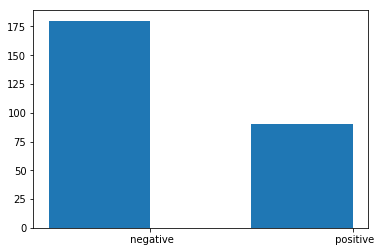

In [4]:
#Before
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt


labels, values = zip(*Counter(y_resampled).items())

indexes = np.arange(len(labels))
width = 0.5

plt.bar(indexes, values, width)
plt.xticks(indexes + width *0.5, labels)
plt.show()

In [5]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)

clf.fit(X_train, y_train)

report = classification_report(y_test, clf.predict(X_test))

In [6]:
import matplotlib.pyplot as plt
def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.Blues):

    lines = cr.split('\n')

    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]:
        #print(line)
        t = line.split()
        # print(t)
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        print(v)
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)


    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')

[0.95, 1.0, 0.97]
[1.0, 0.73, 0.84]


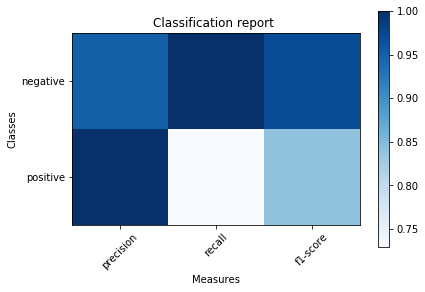

In [7]:
plot_classification_report(report)

In [8]:
score=accuracy_score(y_test, clf.predict(X_test))

In [9]:
score

0.9538461538461539